# Predicting Player's Data Contibutions Based on their Experience #

*Skye Fort, Lauren Friesen, Taylor Jackson & Sam Thompson*

## Introduction ##
Minecraft, a game of blocks, building, and exploration developed in Java, has captivated millions worldwide. Over the years, its interactive nature has made it a platform of growing interest for research, particularly with advancements in AI. UBC PLAI Lab attempts to train a generative Ai model using audio recording of multiplayer minecraft. This project aims to create accurate predictive tools for targeted demographic research.

The central question is: How effectively can self-reported experience and age predict a player's contribution to the study, as measured by playtime hours? To address this, we will utilize the Plaicraft dataset, which provides detailed player data, including exact playtime, age, self-reported experience, and derived metrics like total sessions played.

By analyzing these variables, this project seeks to identify the most significant factors and relationships that define key player demographics. The ultimate goal is to help researchers pinpoint and engage suitable participants for future studies effectively.


## Methods ##

With an overall goal and research question in place, it is time to dive into the coding as we look to find a correlation between players’ ages/experience levels and their total contribution to the data collection process in play time.

In [ ]:
#Load R library packages to access all necessary functions

library(tidyverse)
library(repr)
library(rvest)
library(tidymodels)
library(dplyr)
library(ggplot2)

<<<<<<< local
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ─────

**Loading the data sets into R:**
The data available for us to analyze was contained in two separate data sets: Players data and Sessions data. We loaded both by creating URL variables and using the read_csv function as they are data sets with variables separated by commas. The variables that we want to analyze in particular are in the Players data (age, experience, played_hours).

In [ ]:
#read data from url
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

players_data<-read_csv(players_url)
head(players_data)

sessions_data<-read_csv(sessions_url)
head(sessions_data)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


**A preliminary analysis of the data in our data set:**
After loading in the data, we wanted to explore potential relationships between our predictors (age and experience) and our targeted outcome variable (time contributed), therefore we must perform preliminary exploration of the distributions of each factor. First, we created a visualization demonstrating players' age distribution using a histogram. From this, we were able to observe a wealth of players from ages 17 to 24 making up the majority of the data set. With an idea of the most common player ages established, we then wanted to infer into the play time contributed by each of these age ranges. We were able to do this by creating a bar chart with player age ranges on the x-axis and hours spent playing on the y-axis, and it was very apparent that that group from 15-25 make up the vast majority of the data contribution. The last variable we wanted to explore was player experience, which were categorical variables we organized into a bar graph, revealing that most players in the data set were amateurs and veterans.

`summarise()` has grouped output by 'age_group'. You can override using the
`.groups` argument.


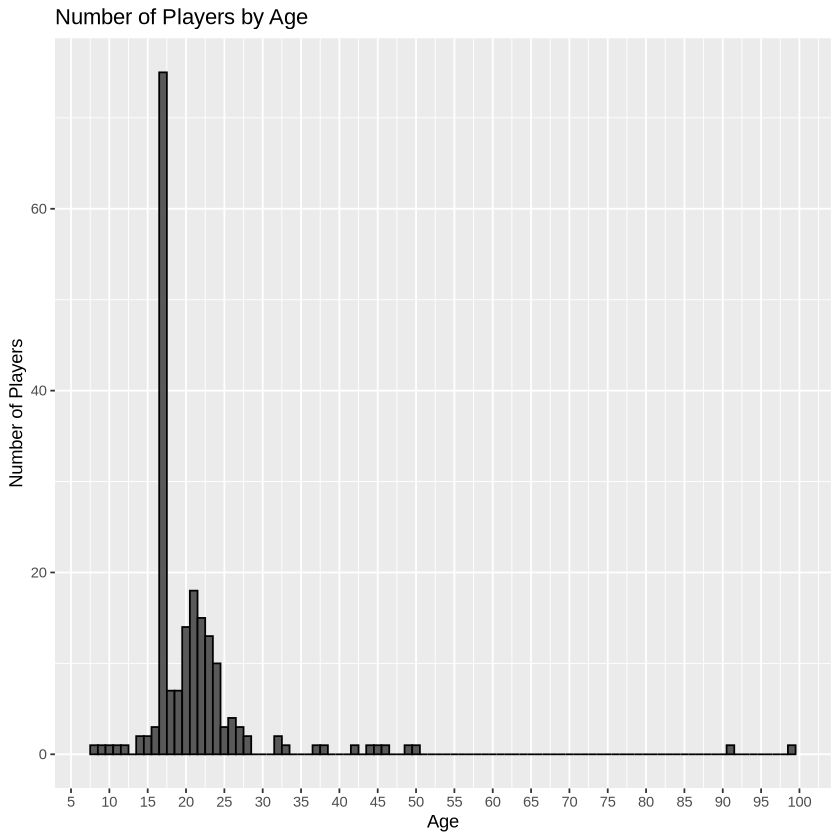

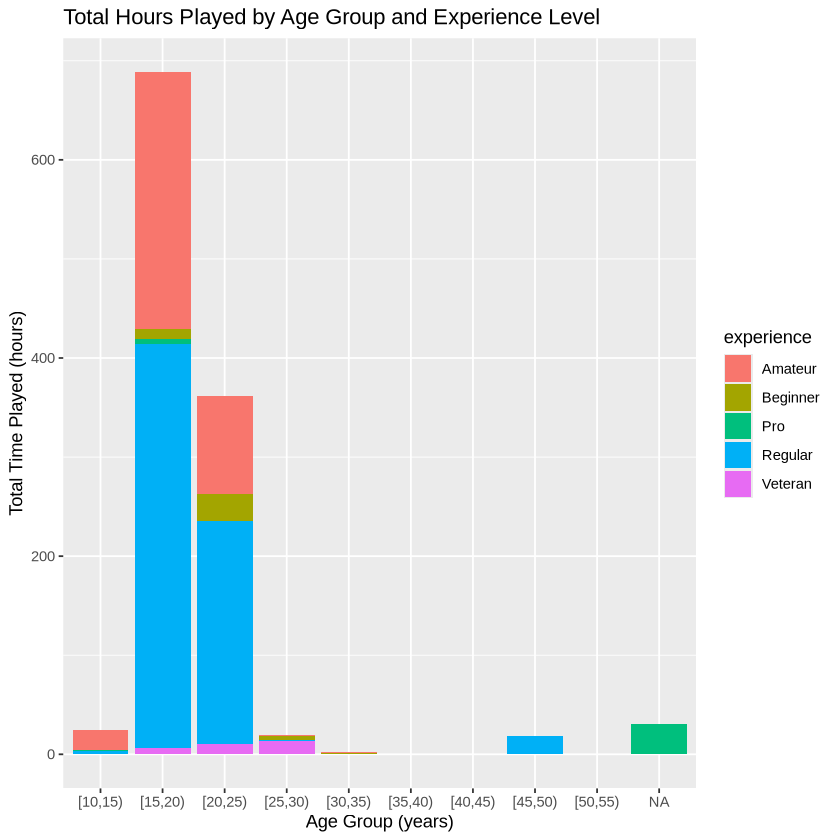

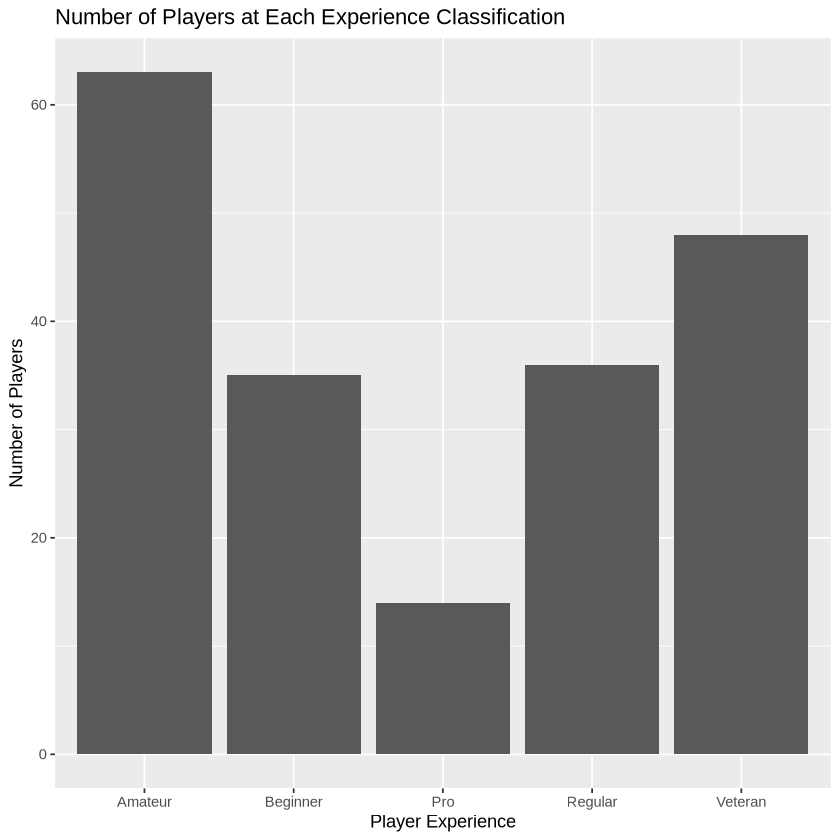

In [13]:

age_plot<-ggplot(players_data, aes(x=age))+
geom_histogram(binwidth=1,color="black")+
scale_x_continuous(breaks=seq(0,100, 5))+
labs(title="Number of Players by Age",
     x="Age",
     y="Number of Players")
age_plot

players_data$age_group<-cut(players_data$age, 
                              breaks = seq(10, 70, by = 5),
                              right = FALSE)

players_table<-table(players_data$age_group) 

summarized_data <- players_data |>
  group_by(age_group, experience) |>
  summarise(total_hours = sum(played_hours, na.rm = TRUE))

hours_by_age<-ggplot(summarized_data, aes(x = age_group, y = total_hours, fill=experience)) +
  geom_bar(stat = "identity") +  
  labs(title = "Total Hours Played by Age Group and Experience Level", 
       x = "Age Group (years)", 
       y = "Total Time Played (hours)")
hours_by_age

experience_counts<-players_data|>
count(experience)

experience_plot<-ggplot(experience_counts, aes(x=experience, y=n))+
geom_bar(stat="identity")+
labs(x="Player Experience",
     y="Number of Players",
    title="Number of Players at Each Experience Classification")

experience_plot

**Summary of preliminary data analysis:** 
To perform the above analysis, we loaded the required libraries to wrangle, explore and visualize our data. We then pulled the required data set from the web by storing it as a url and using the read_csv function to load it into a readable R format. Before proceeding to answer our stated question, we created several visualizations to better allow us to understand our data. This included a histogram of the age frequency of our users, a segmented bar plot of age vs play time (in hours) colored by user experience.

In [ ]:
contribution <- players_data |>
    select(experience, played_hours, age)
head(contribution)

experience,played_hours,age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17


**Narrowing the data set down with Select:**
Given our variables of interest were user experience level and age and to predict playtime, no data wrangling or cleansing was required to answer our question when using a K nearest neighbor regression model. However, to simplify our analysis, we narrowed the data frame down to include just these three columns. This serves to make it easier on our computer and R when running our code, in addition to reducing the chance of making a human error. This reduced data set can be seen above after the select function was applied.

In [ ]:
set.seed(2000)

contribution_split <- initial_split(contribution, prop = 0.6, strata = played_hours) 

contribution_training <- training(contribution_split)
contribution_testing <- testing(contribution_split) 

**Splitting the data into Training and Testing sets:**
In order to perform the K nearest neighbors regression model, we split our data into training and testing sub groups. We set our proportion equal to 60% as this percentage was commonly referenced in the textbook best practices section. In addition, we would also like to use cross validation to ensure our model is being trained and tested on as many unique data sets as possible.

In [ ]:
contribution_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("regression") 

contribution_recipe <- recipe(played_hours ~ age + experience, data = contribution_training)
       
contribution_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



**Creating a Model and Recipe for our data analysis:**
Here we specify the data analysis model we will be using as a KNN regression model and produce a recipe indicating that we will be determining predicted play time based on the variables of age and experience.

In [ ]:
contribution_vfold <- vfold_cv(contribution_training, v = 5, strata = played_hours) 

contribution_workflow <- workflow() |>
                    add_recipe(contribution_recipe) |>
                    add_model(contribution_spec) |>
                    fit(data = contribution_training)
contribution_workflow

Warning message:
“tune samples were requested but there were 116 rows in the data. 111 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 5.630623
Minimal mean squared error: 320.7318
Best kernel: rectangular
Best k: 111

**Creating a Workflow:**
Next, we established a workflow from our model using the recipe and model specified in the last step and using the fit function to indicate that we will use the training data.

In [8]:
gridvals <- tibble(neighbors = seq(from = 1, to = 86, by = 10)) 

contribution_results <- contribution_workflow |>
                    tune_grid(resamples = contribution_vfold, grid = gridvals) |>
    collect_metrics()
contribution_results

contribution_min <- contribution_results |>
    filter(.metric == "rmse") |>
    arrange(mean) |>
    slice (1)
contribution_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,19.443413206,5,8.019895256,Preprocessor1_Model1
1,rsq,standard,0.034219295,5,0.027075241,Preprocessor1_Model1
11,rmse,standard,15.439594423,5,5.986557976,Preprocessor1_Model2
11,rsq,standard,0.039597525,5,0.018421892,Preprocessor1_Model2
21,rmse,standard,13.821957341,5,6.333632573,Preprocessor1_Model3
21,rsq,standard,0.029699943,5,0.013860727,Preprocessor1_Model3
31,rmse,standard,13.456814023,5,6.441806980,Preprocessor1_Model4
31,rsq,standard,0.027127860,5,0.014058439,Preprocessor1_Model4
41,rmse,standard,13.375724923,5,6.487553275,Preprocessor1_Model5


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
41,rmse,standard,13.37572,5,6.487553,Preprocessor1_Model5


**Finding the best K value to use:**
The next step is to ensure we correctly specify our recipe and model. We want to add a tune argument on how many neighbors we would like to use. As shown above, we selected neighbor values between 1 and 86 (inclusive) by increments of 10. After setting this tuning parameter, using cross fold validation, and specifying our recipe and model, we are finally ready to create a workflow. We use the workflow() and fit() functions on our training data before utilizing the collect_metrics() function. After examining the output, we are able to use the filter function to establish what K gives us the lowest RMSE. We see from above, the answer to this question is K = 41. We will therefore specify a new model specification that sets the neighbors argument to 41 (instead of tune() as seen initially).

In [9]:
contribution_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 41) |>
          set_engine("kknn") |>
          set_mode("regression")

contribution_best_fit <- workflow() |>
          add_recipe(contribution_recipe) |>
          add_model(contribution_best_spec) |>
          fit(data = contribution_training)

contribution_summary <- contribution_best_fit |>
           predict(contribution_testing) |>
           bind_cols(contribution_testing) |>
           metrics(truth = played_hours, estimate = .pred)

contribution_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.880885e+01
rsq,standard,7.286053e-04
mae,standard,1.171947e+01


**Workflow and Fit with the correct K value:**
We are now ready to re-run the workflow() and fit() functions with the right K value. We can now use the predict() function on our testing data set with the trained model we have just obtained. However, we first need to use the metrics function to tell R what the true value of the hours played is in relation to our estimate. After analyzing the RMSPE for our out of sample test data set, we will create a plot to visually inspect the accuracy of the model. We plot age vs the true played hours as a scatter plot, with the predicted playtime overlaid as a line plot. As observed above, our model does a relatively good job predicting a players play time based on their age (as observed by the scatterplot and the low RMSPE). However, there do appear to be a few outliers for playtime that are biasing our estimates upwards.

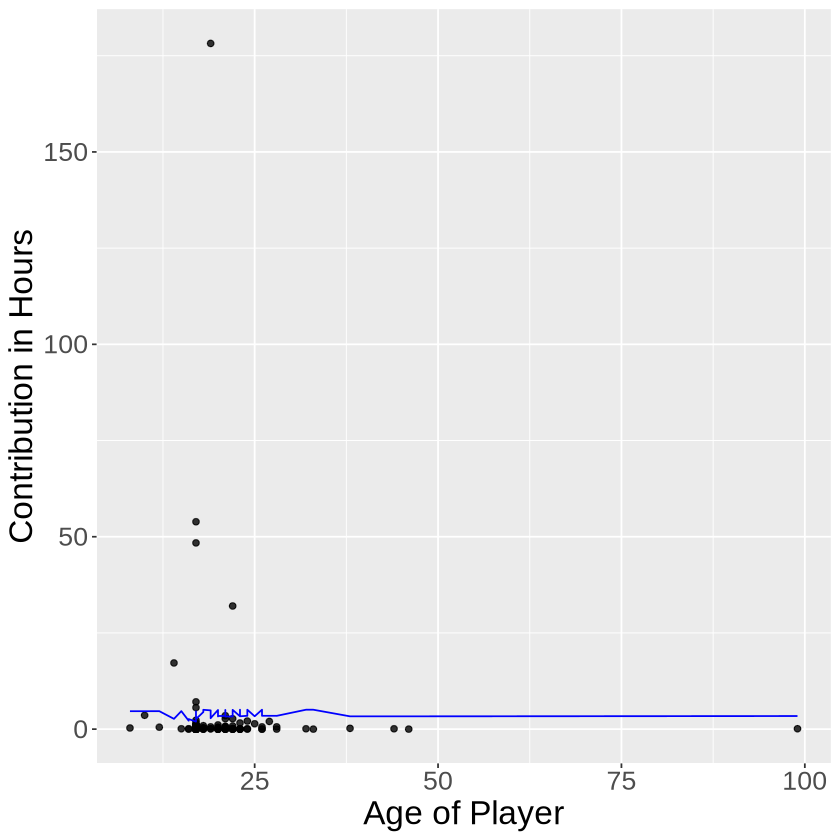

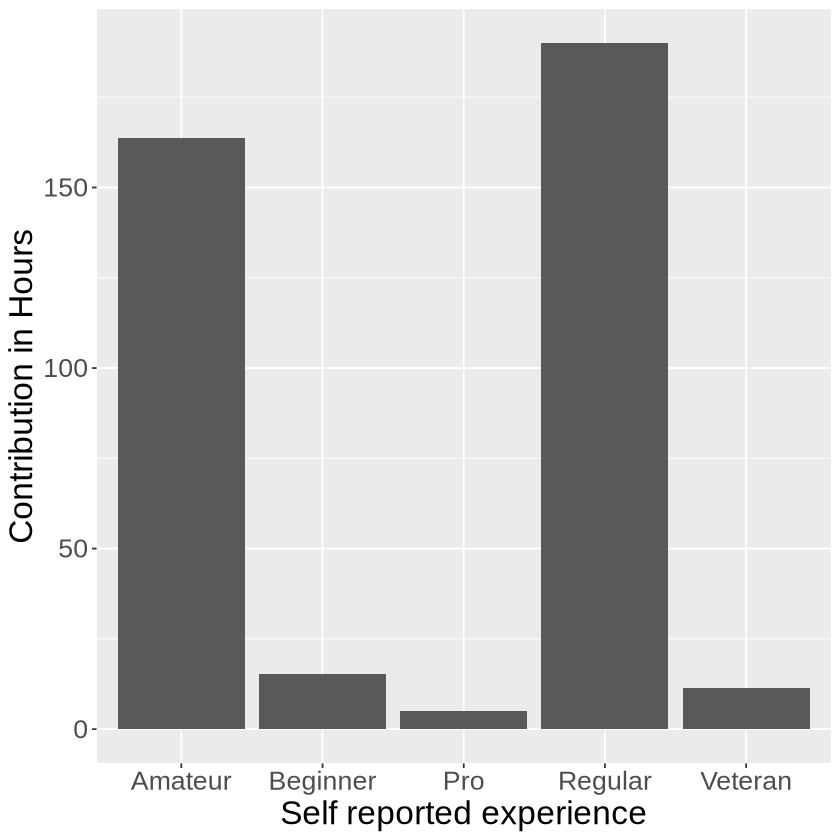

In [10]:
contribution_preds <- contribution_best_fit |>
        predict(contribution_training) |>
        bind_cols(contribution_training) 

contribution_plot <- ggplot(contribution_preds, aes(x = age, y = played_hours)) +
        geom_point(alpha = 0.8) +
        xlab("Age of Player") +
        ylab("Contribution in Hours") +
        geom_line(data = contribution_preds, aes(x = age, y = .pred), color = "blue") +
        theme(text = element_text(size = 20))
contribution_plot

contribution_plot_2 <- ggplot(contribution_preds, aes(x = experience, y = played_hours)) +
        geom_bar(stat="identity") +
        xlab("Self reported experience") +
        ylab("Contribution in Hours") +
        theme(text = element_text(size = 20))
contribution_plot_2 

**Final analysis of Age and Experience effect on Play Time:**
The next step is to create a bar chart of players' experience level vs their play time. We can see that both regular and amateur players have much higher play times. However, it is important to note that these results are on aggregate, as these experience levels have much more users. Beginner, pro and veteran players all contributed very little to the data set, however, once again, this is due to having only a few observations of these experience levels in our data set.

# Discussion #

From the above analysis, using k-nearest neighbors, it is evident that experience level has a greater impact on the amount of data the player is anticipated to produce, compared to age. Regular and amateur skill levels contributed the most data (in hours) compared to other skill groups. We did have a couple outliers in the data that contribued significantly to our preliminary exploration, however using KNN allowed us to overlook those and get a better representation of our dataset. 

Age data showed that there was not a significant difference in the amount of data produced. Preliminary data exploration looked as if there would be a significant increase in data produced by the [15,20) age group, however after further analysis we see that this is mostly due to the increased amount of participants in that age group. 

Based on our findings, the targeted demographics for data contribution should be mostly directed towards people who are (self-reported) amateur or regular players, regardless of age. It should not, however, be neglected that the majority of players are in the age range of [15,25); therefore, if the researchers are looking for what people may be interested in playing at all, they should focus their efforts on teenage to young adults. Our findings only show that age does not contribute significantly in the amount of time they spend on the game. 

Future questions could be related to the amount of times a player is likely to rejoin the server (and continuously contribute data) when looking at experience level. Ultimately, having regular players contribute consistent amounts to the server helps limit the amount of outreach needed to attract people. 